In [3]:
def matrixplot(start_date,end_date): 
    # Configure plotting in Jupyter
    from matplotlib import pyplot as plt
    %matplotlib inline
    plt.rcParams.update({
        'figure.figsize': (26, 15),
        'axes.spines.right': False,
        'axes.spines.left': False,
        'axes.spines.top': False,
        'axes.spines.bottom': False})
    plt.rcParams['font.sans-serif'] = ['SimHei']
    # Seed random number generator
    from numpy import random as nprand
    seed = hash("Network Science in Python") % 2**32
    nprand.seed(seed)
    import seaborn as sns
    import datetime
    import pandas as pd
    from sqlalchemy import create_engine
    import numpy as np
    conn=create_engine('mysql+pymysql://root:lv+7)!@@SHZX@localhost:3306/pledge?charset=gbk')
    sql_query = "select * from trading_data where date_format(日切日期,'%%Y/%%m/%%d')>='" + start_date +\
    "'and date_format(日切日期,'%%Y/%%m/%%d')<='" + end_date +"'"
    df = pd.read_sql(sql_query,con=conn)
    
    typelist=['投资咨询类公司','保险公司','保险资产管理公司','城市商业银行','农商行和农合行','邮政储蓄银行','股份制商业银行'\
          ,'农信社及联社','外资银行分行','其他存款类金融机构','国有控股商业银行','外资银行法人','村镇银行','财务公司'\
          ,'资产管理公司','金融租赁公司','信托公司','证券公司','期货公司','政策性银行','银行理财产品','职业年金','证券投资基金'\
          ,'养老基金','证券公司资产管理计划','基金管理公司及其子公司特定客户资产管理计划','企业年金','保险资产管理计划','保险产品'\
          ,'社保基金','养老金产品','私募投资基金','信托计划','保险保障基金','期货公司资产管理产品','其他非法人类产品','其他特殊机构'\
          ,'托管人','境外参加银行','境外人民币清算行']
    matrix = pd.DataFrame(np.zeros((len(typelist),len(typelist)),dtype=float),index=typelist,columns=typelist)
    start_date = datetime.datetime.strptime(start_date,'%Y/%m/%d')
    end_date = datetime.datetime.strptime(end_date,'%Y/%m/%d')

    title = list(df.columns)
    date_idx=title.index('日切日期')
    buyertype_idx=title.index('正回购方机构类别')
    sellertype_idx=title.index('逆回购方机构类别')
    amount_idx=title.index('首期结算金额（亿元）')
    for i in range(len(df)):
        trade_date=datetime.datetime.strptime(df.iloc[i,date_idx],'%Y/%m/%d')
        if trade_date>=start_date and trade_date<=end_date:        
            matrix.loc[df.iloc[i,buyertype_idx],df.iloc[i,sellertype_idx]]+=float(df.iloc[i,amount_idx])
    sns.heatmap(matrix,cmap="YlGnBu",annot=True,fmt='.2f',linewidths=0.05,linecolor='white',annot_kws={'size':8,'weight':'bold'})

    plt.show()

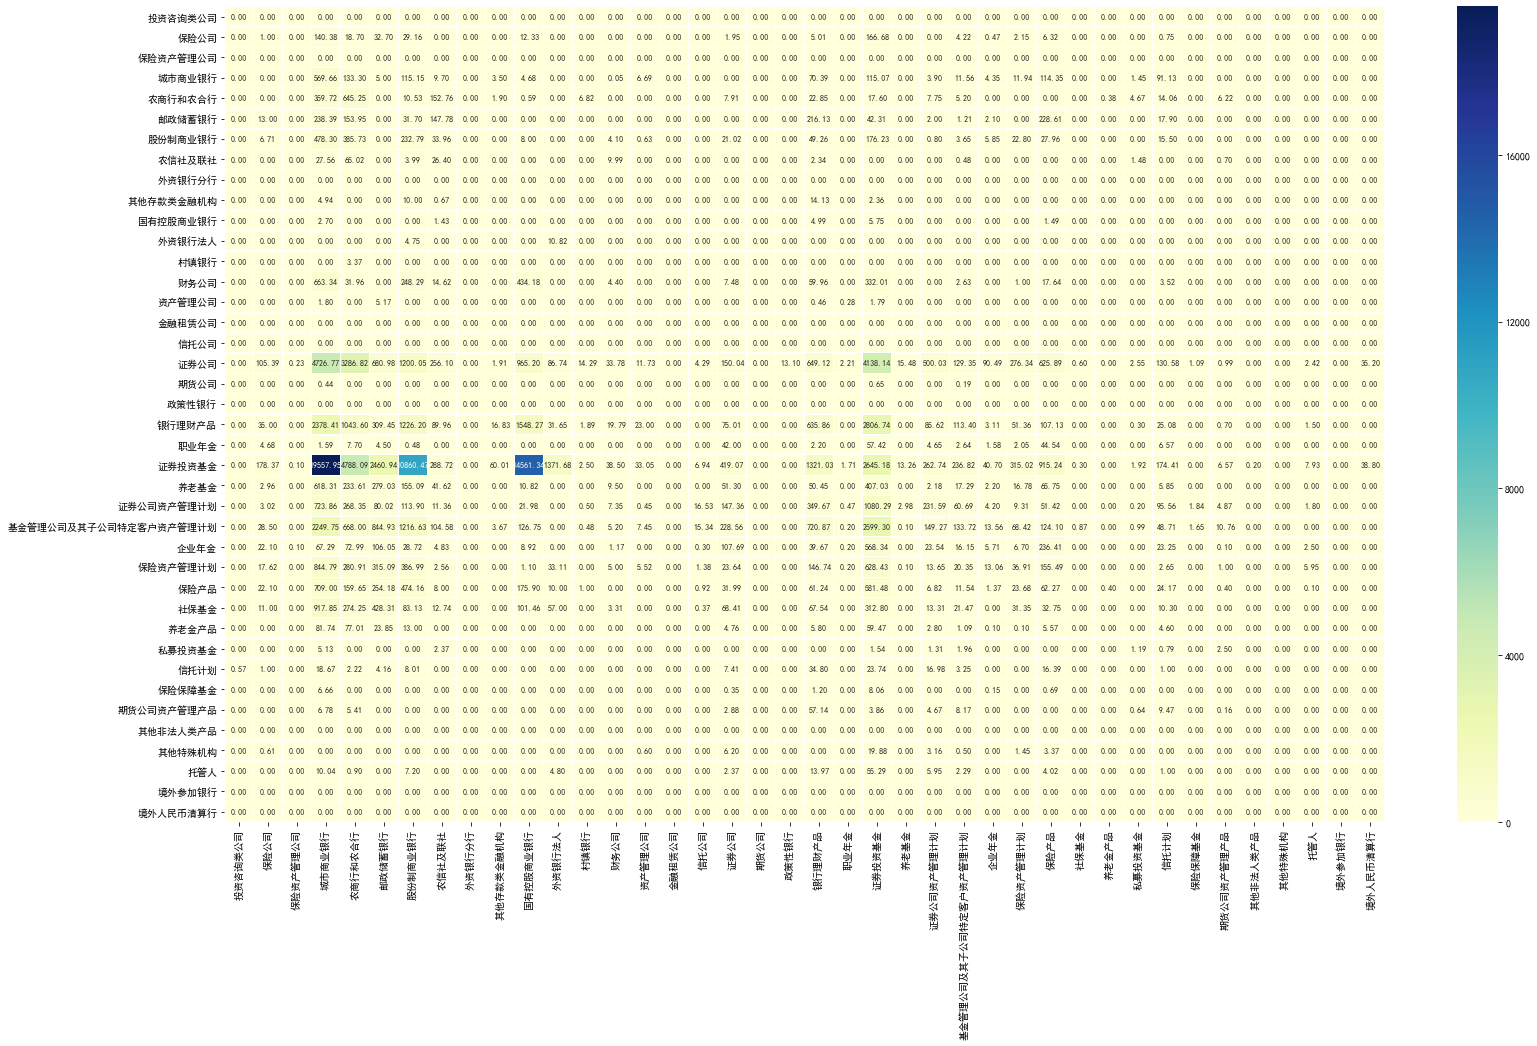

In [5]:
matrixplot("2020/03/30","2020/04/30")